# Diwali Sales Analysis

*libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# sns.set_palette(palette ='viridis' , color_codes = True)
sns.set()

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'latin-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


*preprocessing*

In [3]:
df['unnamed1'].isnull().all()

True

In [4]:
df['Status'].isnull().all()

True

In [5]:
df=df.drop(columns=['Status','unnamed1'])

In [6]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace= True)

In [8]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [10]:
df.shape

(11239, 13)

In [11]:
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0


In [12]:
df.drop_duplicates()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [13]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770.00


In [14]:
df['Relationship_Status'] = ''

for index, value in df['Marital_Status'].items():
    if value == 1:
        df.loc[index, 'Relationship_Status'] = 'Married'
    else:
        df.loc[index, 'Relationship_Status'] = 'Unmarried'

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Relationship_Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Married


In [16]:
df[['Age' , 'Orders' , 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              11239 non-null  int64  
 1   Cust_name            11239 non-null  object 
 2   Product_ID           11239 non-null  object 
 3   Gender               11239 non-null  object 
 4   Age Group            11239 non-null  object 
 5   Age                  11239 non-null  int64  
 6   Marital_Status       11239 non-null  int64  
 7   State                11239 non-null  object 
 8   Zone                 11239 non-null  object 
 9   Occupation           11239 non-null  object 
 10  Product_Category     11239 non-null  object 
 11  Orders               11239 non-null  int64  
 12  Amount               11239 non-null  float64
 13  Relationship_Status  11239 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.5+ MB


## Total Revenue Generated

In [18]:
df['Amount'].sum()

106249132.43

Total Revenue Genereated is 106 249 132.43 INR
or 10.62 Crore INR

## Revenue Generation

### Gender

In [19]:
results = df.groupby('Gender')
results

In [20]:
results['Amount'].sum()

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64

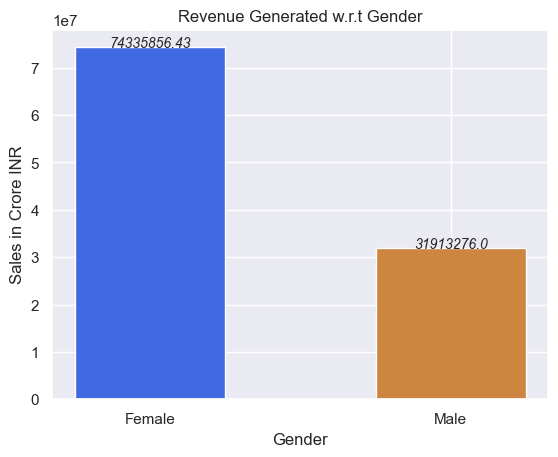

In [21]:
gender = ['Female','Male']
bars = plt.bar(gender,results['Amount'].sum() , align = 'center' , color = ['royalblue' , 'peru'] , width = 0.5)
plt.ylabel('Sales in Crore INR')
plt.xlabel('Gender')

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x()+0.25,y = y_val + 0.5, s=y_val , style= 'oblique' , ha= 'center', fontsize= 10)

plt.title("Revenue Generated w.r.t Gender")

plt.show()

In [22]:
results['Amount'].count()

Gender
F    7832
M    3407
Name: Amount, dtype: int64

Text(0.5, 1.0, 'Order w.r.t Gender')

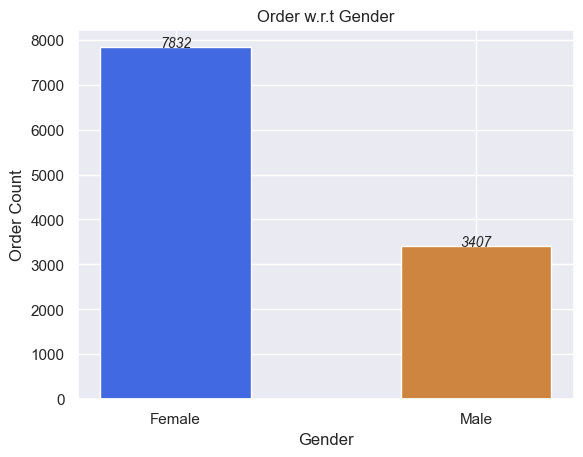

In [23]:
bars = plt.bar(gender,results['Amount'].count() , align = 'center' , color = ['royalblue' , 'peru'] , width = 0.5)
plt.ylabel('Order Count')
plt.xlabel('Gender')

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x()+0.25,y = y_val + 0.5, s=y_val , style= 'oblique' , ha= 'center', fontsize= 10)

plt.title("Order w.r.t Gender")


*Females have bought the most Products as well as spend more than Males*

### Age group

In [24]:
results = df.groupby('Age Group',as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
results

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


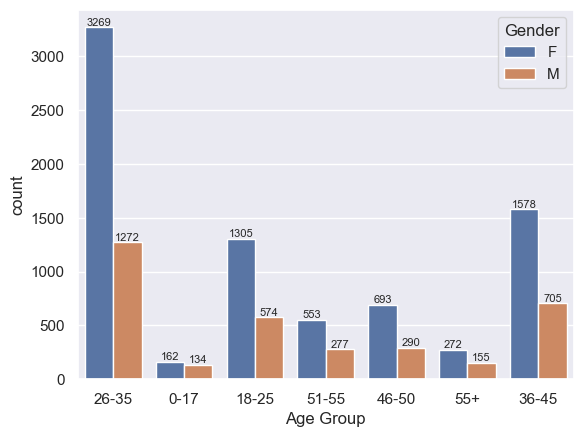

In [25]:
ax = sns.countplot( x = 'Age Group' ,hue='Gender', data = df)

for bar in ax.containers:
    ax.bar_label(bar, fontsize= 8)

<Axes: xlabel='Age Group', ylabel='Amount'>

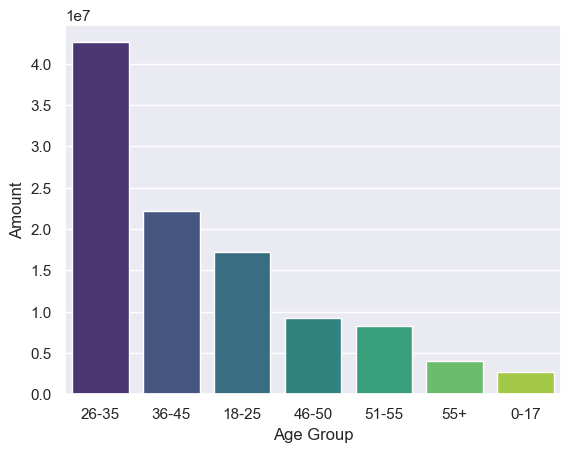

In [26]:
sns.barplot(x ='Age Group' , y='Amount', data = results , palette = 'viridis' , hue = 'Age Group' , legend= False)

*From the following data Age group of 26-35 have bought more products followed by 36-45*

### State

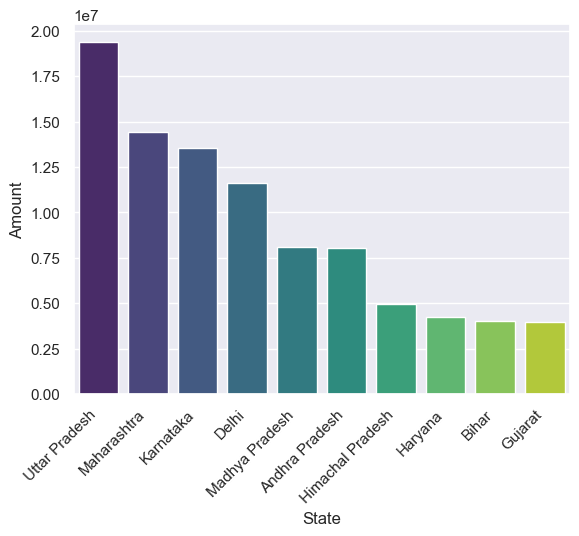

In [27]:
results = df.groupby('State',as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x ='State' , y='Amount', data = results.head(10) ,palette = 'viridis' , hue = 'State' , legend = False)
plt.xticks(rotation=45 , ha='right')
plt.show()

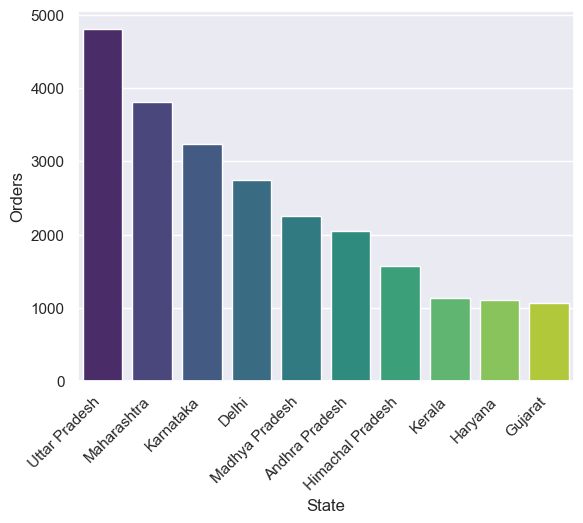

In [28]:
results = df.groupby('State',as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)
sns.barplot(x ='State' , y='Orders', data = results , palette = 'viridis' , hue = 'State' , legend = False)
plt.xticks(rotation=45 , ha='right')
plt.show()

### Occupation

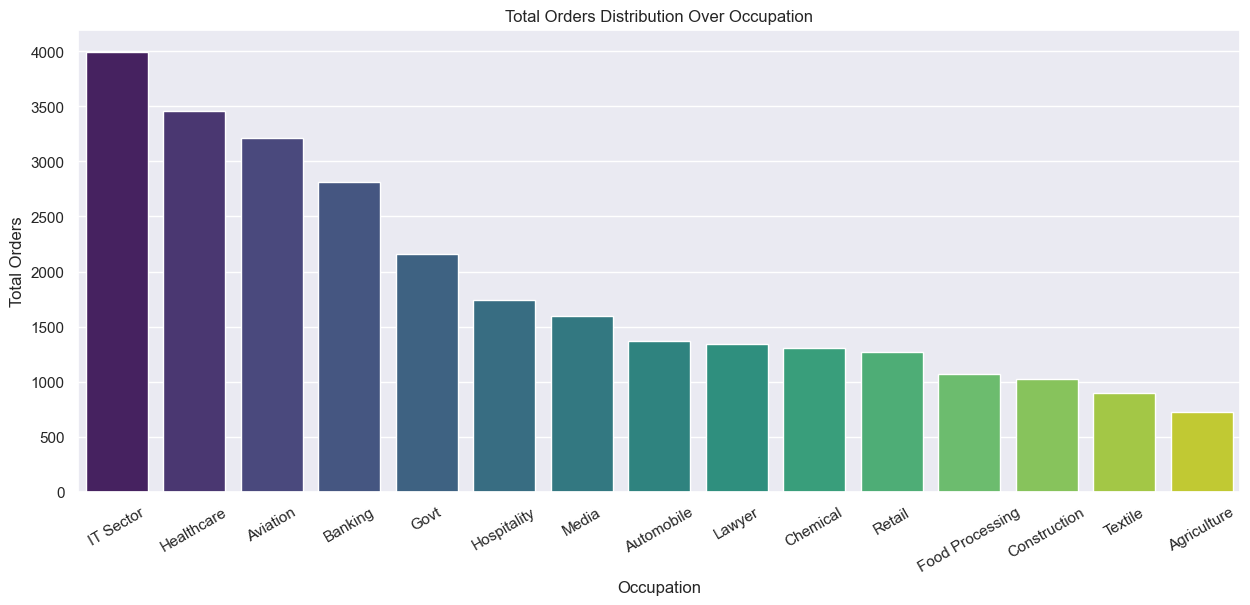

In [29]:
result = df.groupby("Occupation", as_index=False)['Orders'].sum().sort_values(by='Orders' , ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x='Occupation' , y = 'Orders' , data = result ,palette = 'viridis' , hue = 'Occupation' , legend = False)
plt.xticks(rotation=30)
plt.ylabel("Total Orders")
plt.title("Total Orders Distribution Over Occupation")
plt.show()

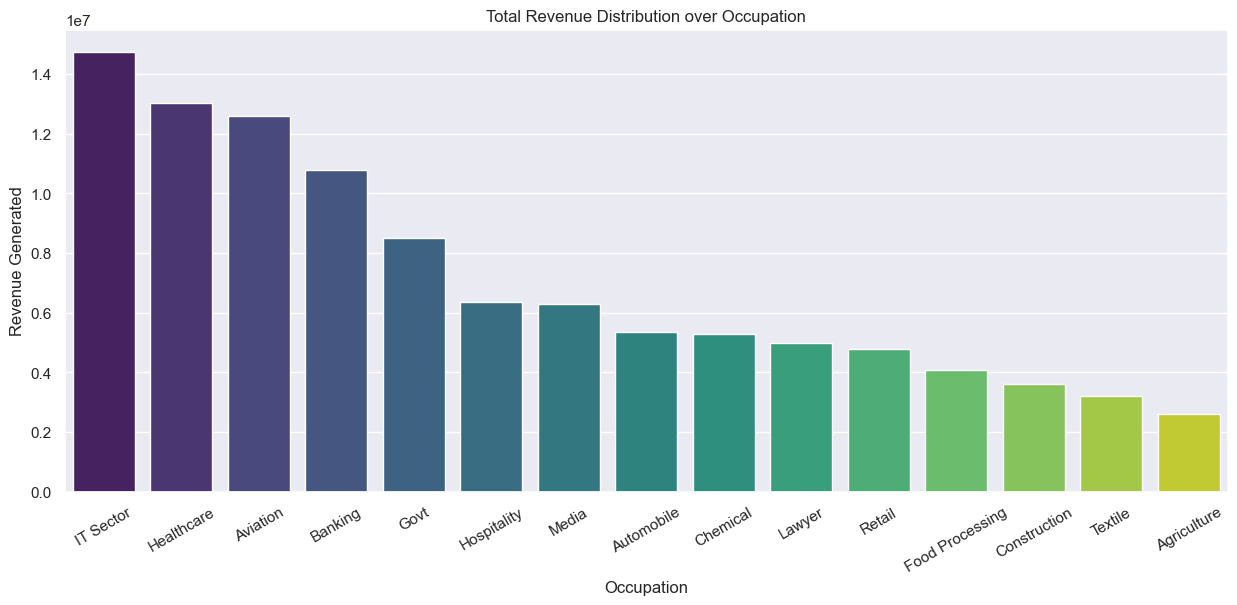

In [30]:
result = df.groupby("Occupation", as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x='Occupation' , y = 'Amount' , data = result , palette='viridis' , hue = 'Occupation' , legend = False)
plt.xticks(rotation=30)
plt.ylabel('Revenue Generated')
plt.title("Total Revenue Distribution over Occupation")
plt.show()

**Findings:**
People with It Sectors have brought more revenure followed by people with Healthcare and Aviation.
This is also same for the Total Orders bought

### Marital Status

In [31]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Relationship_Status
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,Unmarried
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,Married
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,Married
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,Unmarried
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,Married


In [32]:
result = df.groupby(['Relationship_Status','Gender'] , as_index = False)['Amount'].sum()
result

,Relationship_Status,Gender,Amount
0,Married,F,30549207.99
1,Married,M,13574538.00
2,Unmarried,F,43786648.44
3,Unmarried,M,18338738.00


<Axes: xlabel='Relationship_Status', ylabel='Amount'>

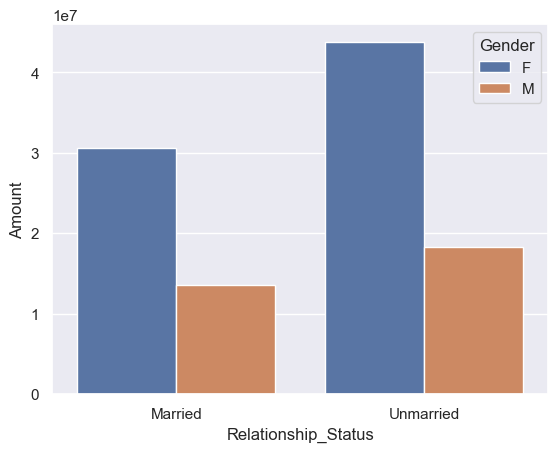

In [33]:
sns.barplot(x='Relationship_Status' , y = 'Amount' , hue = 'Gender' , data = result)

<Axes: xlabel='Relationship_Status', ylabel='count'>

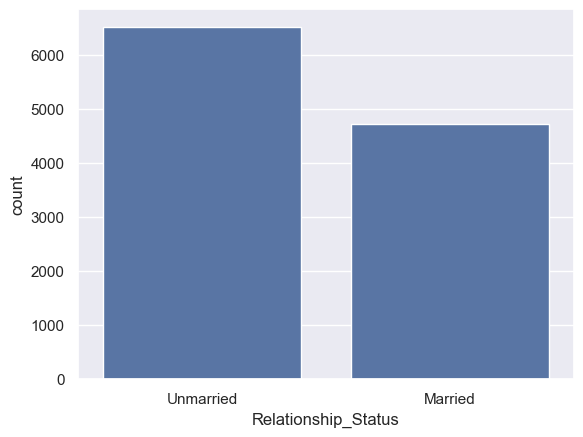

In [41]:
sns.countplot(x='Relationship_Status' , data = df)

<Axes: xlabel='Relationship_Status', ylabel='Orders'>

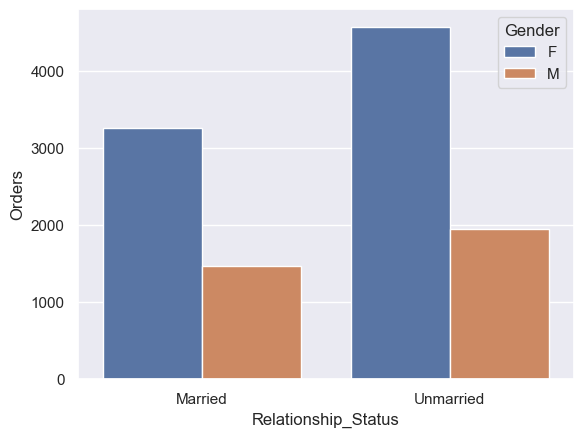

In [53]:
result = df.groupby(['Relationship_Status','Gender'] , as_index = False)['Orders'].count()
sns.barplot(x='Relationship_Status' , y = 'Orders' , hue = 'Gender' , data = result)

Unmarried Female Customers have bought the most product

## Most Products Sold

In [36]:
result = df.groupby('Product_ID' , as_index = False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)
result

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


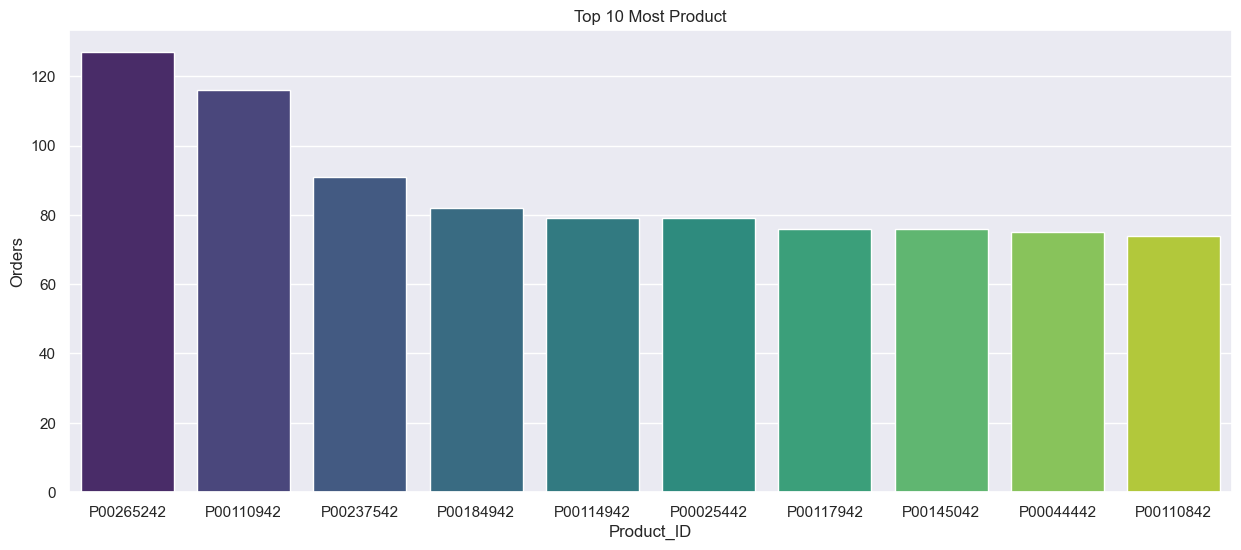

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x='Product_ID' , y = 'Orders' ,data = result , palette = 'viridis' , hue = 'Product_ID' , legend = False)

plt.title("Top 10 Most Product")
plt.show()

10 Product with the highest number of Order

#### By Category

In [38]:
result = df.groupby('Product_Category' , as_index = False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)
result

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6110
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2646
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,889
14,Sports Products,870
13,Pet Care,536


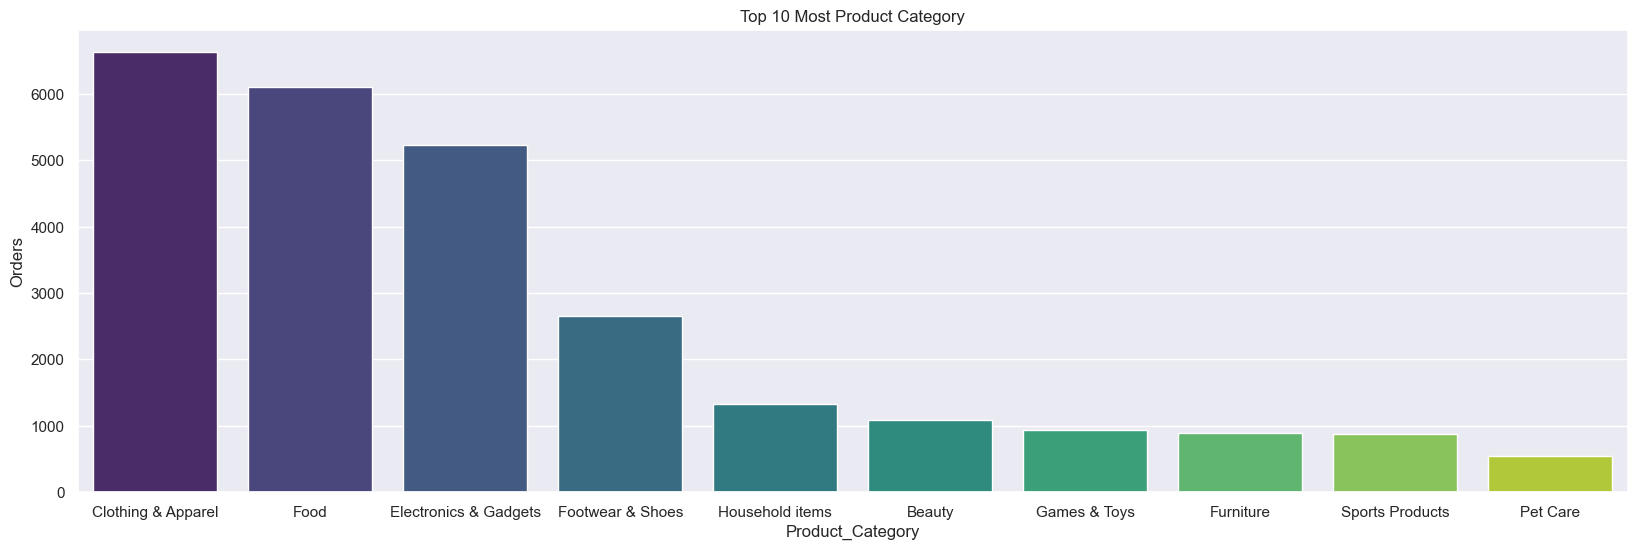

In [39]:
result = df.groupby('Product_Category' , as_index = False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)
result
plt.figure(figsize=(20,6))
sns.barplot(x='Product_Category' , y = 'Orders' ,data = result , palette = 'viridis' , hue = 'Product_Category' , legend = False)

plt.title("Top 10 Most Product Category")
plt.show()

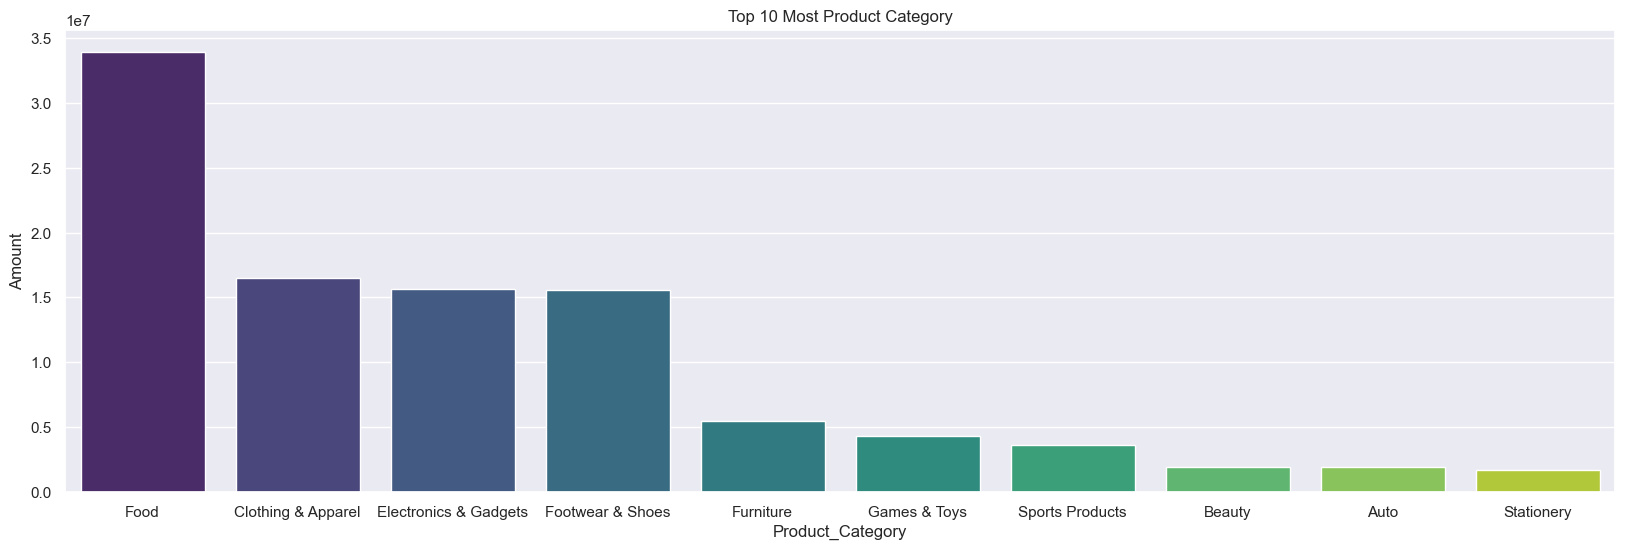

In [40]:
result = df.groupby('Product_Category' , as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
result
plt.figure(figsize=(20,6))
sns.barplot(x='Product_Category' , y = 'Amount' ,data = result , palette = 'viridis' , hue = 'Product_Category' , legend = False)

plt.title("Top 10 Most Product Category")
plt.show()

**From the Above Graph**
* Food are the most sold products followed by Clothing And Apparel and Electronics & Gadgets

# *Conclusion*

According To Diwali Sales Report, We have analyzed following important points

69% of the Revenue has been generated from Females while also being bought the most product